# <center>Rovnice mělké vody a Godunovova metoda</center>


<center><b>semestrální práce KMA/SNM2</b></center>
<center><b>Anežka Švandová a Honza Půlpán</b></center>
<br><br><br><br>

## Teoretický úvod

### Rovnice mělké vody
Saint-Venantovy rovnice, nebo také rovnice mělké vody (shallow water equations - SWEs), popisují proudění korytem řeky. My se zabýváme zjednodušeným případem, kdy předpokládáme koryto řeky s konstantním obdélníkovým průřezem. Jedná se tedy o jednodimenzionální úlohu ve tvaru

\begin{equation*} \label{eq1}
\begin{bmatrix}
    h \\  
    hu \\ 
\end{bmatrix}_{t} +
\begin{bmatrix}
    uh \\
hu^{2}+ \textstyle \dfrac{1}{2}gh^{2}
\end{bmatrix}_{x} = 0,
\end{equation*}

kde $h=h(x,t)$ reprezentuje hledanou hloubku, $u=u(x,t)$ horizontální rychlost a $ g $ je gravitační konstanta. Hodnota $hu$ se označuje často jako průtok, anglicky discharge.

Obecněji úlohů můžeme zapsat jako nelineární systém hyperbolických parciálních diferenciálních rovnic ve tvaru zákona zachování

\begin{equation*}
q_{t}+f(q)_{x}=0,
\end{equation*}

kde $q(x,t)=\begin{bmatrix}h \\ hu \end{bmatrix}$ a $f(q)=\begin{bmatrix} uh \\ hu^{2}+ \textstyle \dfrac{1}{2}gh^{2}\end{bmatrix}$. 

Všechny následující úvahy počítají s nelineárním systémem hyperbolických parciálních diferenciálních rovnic.

### Riemannův problém
Obecnou počáteční úlohu s nespojitou počáteční podmínkou nazýváme Riemannův problém. V případě Saint-Venantových rovnic se může jednat například o tzv. problém rozbití přehrady (dam-break problem)

\begin{equation*}
\left\{
    \begin{split}
    &q_{t}+f(q)_{x}=0, & \text{ kde }x\in[0,1], t\in(0,T)\\
    &q(x,0)=q_{0}(x)= &\begin{cases} q_{l} \quad \text{ pro }\quad x<x_{0} \\ q_{r} \quad \text{ pro } \quad x>x_{0}\\ \end{cases}, \quad\text{ kde } x_{0}\in \mathbb{R},\\
    \end{split}
    \right.
\end{equation*}


kde $q_l$ a $q_r$ jsou konstanty.

Riemannův problém řešíme pomocí přesného, nebo v některých případech přibližného Riemannova řešiče. Na vstupu očekává Riemannův řešič hodnoty $q_l$ a $q_r$, výstupem je množina vln $\mathcal{W}^p_{i-1/2}$ a jejich rychlostí $s^p_{i-1/2}$, kde index $p$ označuje jednotlivé vlny.

### Godunova metoda

Godunova metoda je explicitní numerická metoda pro řešení parciálně diferenciálních rovnic, založená na metodě konečných objemů. Toky na hranicích kontrolních objemů stanovuje pomocí Riemannových řešičů.

Godunovova metoda nabývá tvaru
$$Q_{i}^{n+1}=Q_{i}^{n}-\frac{\Delta t}{\Delta x}\left(F_{i+1/2}^{n}-F_{i-1/2}^{n}\right).$$

#### Algoritmus Godunovy metody
1. Definujeme uniformní síť bodů $$x_{i}=i\Delta x,\, i = 0,1,\dots N_{x}\in\mathbb{N},$$ 
$$t_{n}=n\Delta t, \, n = 0,1,\dots N_{n}\in\mathbb{N},$$ 
kde $\Delta x > 0 $, $ \Delta t > 0$ jsou námi zvolené prostorové a časové diskretizační kroky. Kontrolní objemy v jednotlivých časových diskretizačních vrstvách jsou pak dány hraničními body $x_{i\pm 1/2}=x_{i}\pm\Delta x/2$.

2. Zkonstruujeme funkci integrálních průměrů přes jednotlivé kontrolní objemy $Q^{n}(x)$. Ta aproximuje řešení v $n$-té časové diskretizační vrstvě a je po částech konstatní s Riemanovy problémy v bodech nespojitosti.

3. Riemannovy problémy na hranicích kontrolních objemů řešíme pomocí přibližných Riemanových řešičů. Získáme vektory vln  $\mathcal{W}^{p}_{i-1/2}$ a jejich rychlostí $s^{p}_{i-1/2}$ pro celou síť. 


4. Vypočteme toky na hranicích kontrolních objemů $F_{i\pm 1/2}^{n}$

\begin{align*} 
    &F_{i-1/2}^{n} = A^{+}\Delta Q_{i-1/2}=\sum_{p}(s^{p}_{i-1/2})^{+}\mathcal{W}^{p}_{i-1/2}, \\ 
    &F_{i+1/2}^{n} = A^{-}\Delta Q_{i+1/2}=\sum_{p}(s^{p}_{i+1/2})^{-}\mathcal{W}^{p}_{i+1/2} 
\end{align*}

5. Určíme hodnoty $Q_i$ pro následující časovou vrstvu

$$Q_{i}^{n+1}=Q_{i}^{n}-\frac{\Delta t}{\Delta x}\left(F_{i+1/2}^{n}-F_{i-1/2}^{n}\right).$$

Kroky 2.-5. opakujeme až do časové diskteritzační vrstvy $t_{N_{t}}=T$.


#### Vlastnosti metody

Godunovova metoda je prvního řádu. Vztah 

$$Q_{i}^{n+1}=Q_{i}^{n}-\frac{\Delta t}{\Delta x}\left(F_{i+1/2}^{n}-F_{i-1/2}^{n}\right)$$

je v konzervativním tvaru a lokální chyba $L_{i}^{n}\rightarrow 0$ pro $\Delta t \rightarrow 0$ za předpokladu $T\geq n\Delta t$.
Tj. Godunova metoda je __konzervativní__ a __konzistentní__. 

Aby bylo zaručeno, že se sousedící Riemannovy problémy neovlivňují a jsme tak schopni vypočítat správné integrální průměry, musí platit CFL podmínka

$$ \frac{s_{max}\Delta t}{\Delta x} \leq 1,$$

kde $s_{max}$ je maximální hodnota rychlosti vlny získaná Riemannovým řešičem. Levou stranu nerovnosti nazýváme Courantovo číslo.

Neumíme dokázat, že Godunovova metoda pro nelineární systémy obecně konverguje. Přesto lze tuto metodu s úspěchem používat.

### Godunova metoda vyššího řádu

- LEVEQUE STR. 121 a 329
- http://www.clawpack.org/wp_algorithms.html#wp-algorithms

Pokud chceme dosáhnout větší přesnosti a tím i menší chyby, lze využít metody vyšších řádů. Ty jsou založeny obecně na metodě Lax-Wendroff, ke které se přidávají omezující funkce (limitry) zabraňující nefyzikálním oscilacím v bodech nespojitosti. Limitry jsou založeny na metodách TVD pro nelineární rovnice. 

Metoda Godunovova typu vyššího řádu má tvar
$$Q_{i}^{n+1}=Q_{i}^{n}-\frac{\Delta t}{\Delta x}\left(A^{+}\Delta Q_{i-1/2}-A^{-}\Delta Q_{i+1/2}\right)-\frac{\Delta t}{\Delta x}\left(\tilde{F}_{i+1/2}-\tilde{F}_{i-1/2}\right),$$

kde $\tilde{F}_{i\pm1/2}$ jsou korekční členy vyššího řádu a jsou definovány jako
\begin{align*}
&\tilde{F}_{i-1/2} = \frac{1}{2}\left|s_{i-1/2}\right|\left(1-\frac{\Delta t}{\Delta x}\left|s_{i-1/2}\right|\right)\tilde{\mathcal{W}}_{i-1/2}, \\
&\tilde{F}_{i+1/2} = \frac{1}{2}\left|s_{i+1/2}\right|\left(1-\frac{\Delta t}{\Delta x}\left|s_{i+1/2}\right|\right)\tilde{\mathcal{W}}_{i+1/2},
\end{align*}

kde $\tilde{\mathcal{W}}_{i\pm 1/2}$ reprezentuje limitní verzi vlny $\mathcal{W}_{i\pm 1/2}$ získanou záměnou $\mathcal{W}^{p}_{i-1/2}$ za $\mathcal{W}^{p}_{i-3/2}$ pro $s^{p}>0$, nebo $\mathcal{W}^{p}_{i+1/2}$ pro $s^{p}<0$. Tyto hodnoty získáme právě pomocí limitrů.

#### Vlastnosti metody

Vlastnosti metod Godunovova typu vyššího řádu jsou obdobné jako u řádu prvního. Metoda je opět v konzervativní a konzistentní (OPRAVDU???) a CFL podmínka má tvar

$$ \frac{s_{max}\Delta t}{\Delta x} \leq 1.$$

Metoda je většinou druhého řádu a i proto způsobuje oscilace v bodech nespojitosti.

## Numerické experimenty

Úlohu mělké vody popsanou v první kapitole řešíme pomocí Godunovovy metody s použitím různých (přibližných) Riemannových řešičů a také s odvozenými metodamy vyšších řádů. Jednotlivé numerické metody porovnáme a to jak výsledné řešení, tak i jeho závislost na dělení na kontrolní objemy a také na CFL podmínce. Pro naši úlohu nastavíme základní parametry jako je velikost gravitační konstanty, interval na kterém úlohu řešíme a počáteční podmínku. 

Následující dvě Python funkce pak nastavují počáteční podmínku a řeší SWE úlohu pro dané parametry. Funkce *shallow_ic()* nastaví jednu z vybraných počátečních podmínek. Na výběr je "dam break", funkce se 2 skoky, sinus a sinus se skokem uprostřed. 

Funkce *shallow_sol()* úlohu SWE řeší, případně i řešení vykreslí. Většina parametrů je nastavena v rozumných defaultních hodnotách, všechny jdou ale přenastavit podle potřeby. Počáteční podmínka může být také jakákoliv, funkce *shallow_ic()* je jen "helper", abychom nemuseli počáteční podmínku konstruovat stále znovu.

Přibližné i přesné Riemannovy řešiče pro SWE úlohu stejně jako i limitery použité později v metodách vyššího řádu jsou převzaty z balíku Clawpack (http://www.clawpack.org/). Přibližné Riemannovy řešiče jsou v samostatném souboru *riemann.py*, přesný řešič v souboru *exact_riemann_solution.py* a limitery v souboru *tvd.py*.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from shallow_water import exact_riemann_solution
import tvd
from riemann import shallow_roe_1D, shallow_hll_1D



plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = (20,7)
plt.rcParams['font.size'] = '12'

*** Warning: JSAnimation not found


In [2]:
# constants
grav = 9.81

# domain
# x-coordinate, centered around 0
x_start = -1.
x_end = 1.

# initial condition setup
def shallow_ic(N, ic_type=1):
    '''
    Initial condition type:
    
    1 ... step in half domain
    2 ... 2 steps in domain
    3 ... sinus
    '''
    
    q_state = np.zeros([2,N])
    
    if ic_type == 3:
        q_state[0,:] = .2 * np.sin(np.linspace(0,4*np.pi,N)) +1
    elif ic_type==4:
        q_state[0,:] = .3 * np.sin(np.linspace(0,4*np.pi,N)) +1
        q_state[0,:int(N/2)] = q_state[0,:int(N/2)] + 2 
    
    elif ic_type == 2:
        for i in range(N):
            if i < N/3:
                q_state[0,i] = 5
            elif N/3 <= i < 2*N/3:
                q_state[0,i] = 3
            else: 
                q_state[0,i] = 1
            
    else:
        q_state[0,0:int(N/2)] = 4
        q_state[0,int(N/2):] = 1

    return q_state

# shallow water system solution
def shallow_sol(q_state,
                x_start=-1.,
                x_end=1.,
                N=200,
                T=.05,
                Nt=50,   
                riemann_solver=shallow_roe_1D,
                higher_order = False,
                limiter=tvd.minmod,
                exact_q=False,
                plot_sol=False,
               ):
    
    # problem_data
    problem_data = {'grav' : grav,
               'efix' : False}
    
    # x axis for plots
    x = np.linspace(x_start, x_end, N)
    
    # size of spatial and time steps
    dx = (x_end-x_start)/N # 0.005 #
    dt = T/Nt
    dtdx = dt/dx
    
    aux_l, aux_r = 0, 0
    limiters = np.full(N,limiter)
    
    #maximalni rychlost
    s_max = np.zeros(Nt)
    
    # ic plot 
    if plot_sol:
        plt.subplot(1, 2, 1)
        plt.plot(x, q_state[0,:], 'b.:')
        plt.xlabel('$x$')
        plt.ylabel('$h$')
        plt.title(f'Hloubka $h$ - počáteční podmínka')
        plt.subplot(1, 2, 2)
        plt.plot(x, q_state[1,:] / q_state[0,:], 'g.:')
        plt.xlabel('$x$')
        plt.ylabel('$h\cdot u$')
        plt.title(f'Průtok $h\cdot u$ - počáteční podmínka')
        plt.show()
    
    # iterate solution for Nt time steps
    for i in range(Nt):
        q_l = q_state[:,:-1]
        q_r = q_state[:,1:]

        # solve Riemann problems at all faces 
        wave, s, amdq, apdq = riemann_solver(q_l, q_r, aux_l, aux_r, problem_data)
        s_max[i] = np.nanmax(np.abs(s))

        # update state with Riemann solutions
        q_state[:,:-1] = q_state[:,:-1] - dtdx * amdq
        q_state[:,1:] = q_state[:,1:] - dtdx * apdq
        
        # in case of higher order solution
        if higher_order:
            dtdx_array = np.full(N, dtdx)

            #wave limiting
            wave_lim = tvd.limit(2,wave,s,limiters,dtdx_array)
            
            F = np.zeros([2,N-1])
            w_num = wave.shape[1]
            
            #fluctuation correction F calculation
            F[0,:] = 1/2. * np.sum(np.abs(s)*(1-dtdx*np.abs(s))*wave_lim[0,:,:],axis=0)
            F[1,:] = 1/2. * np.sum(np.abs(s)*(1-dtdx*np.abs(s))*wave_lim[1,:,:],axis=0)

            #fluctuation correction F added to state
            q_state[:,:-1] = q_state[:,:-1] + dtdx * F
            q_state[:,:-2] = q_state[:,:-2] - dtdx * F[:,1:]

    cfl = np.max(s_max)*dtdx
    if exact_q:
        E = np.sum(np.abs(q_state[1]-exact_q(x/T)[1]))*dx
    else:
        E = False
    
    # solution plot 
    if plot_sol:
        plt.subplot(1, 2, 1)
        plt.plot(x, q_state[0,:], 'b.:')
        plt.xlabel('$x$')
        plt.ylabel('$h$')
        plt.title(f'Hloubka $h$ v čase {T}')
        plt.subplot(1, 2, 2)
        plt.plot(x, q_state[1,:] / q_state[0,:], 'g.:')
        plt.xlabel('$x$')
        plt.ylabel('$h\cdot u$')
        plt.title(f'Průtok $h\cdot u$ v čase {T}')
        plt.show()
    
    return q_state, x, cfl, E

Pro všechny numerické testy volíme jednotnou počáteční podmínku ve tvaru "dam break" a to i z důvodu, že pro takovouto úlohu známe přesné analytické řešení. Jsme tedy schopni numerické řešení snadno porovnat s přesným a stanovit globální diskretizační chybu. Na obrázku je použitá počáteční podmínka.

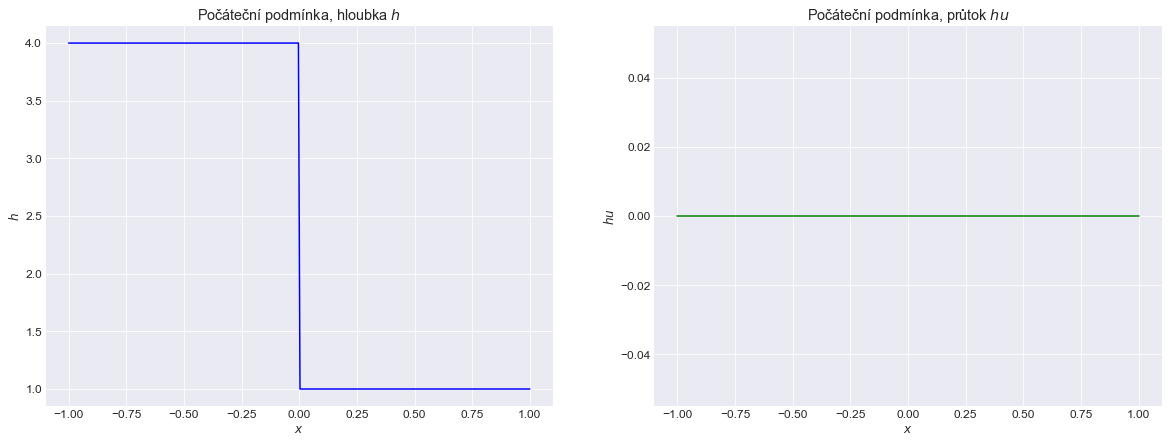

In [3]:
ic = shallow_ic(300,ic_type=1)
x = np.linspace(x_start, x_end, 300)
plt.subplot(1,2,1); plt.plot(x, ic[0], 'b'); plt.title('Počáteční podmínka, hloubka $h$'); plt.xlabel('$x$'); plt.ylabel('$h$')
plt.subplot(1,2,2); plt.plot(x, ic[1], 'g'); plt.title('Počáteční podmínka, průtok $hu$'); plt.xlabel('$x$'); plt.ylabel('$hu$');

Pro analýzu jednotlivých Godunových metod, přibližných Riemannových řešičů a limiterů si nejprve napočítáme SWE úlohu pro různá prostorová dělení sítě *Ns* a pro různé metody jejichž parametry jsou uložené v poli *methods*.

In [4]:
results = []

# formát:
# <název metody><použitý Riemannův řešič><metoda vyššího řádu T/F><použitý limitr>
methods = [['1-Roe',shallow_roe_1D, False, False],
           ['1-hll',shallow_hll_1D, False, False],
           ['2R-minmod',shallow_roe_1D, True, tvd.minmod],
           ['2R-superbee',shallow_roe_1D, True, tvd.superbee],
           ['2R-mc',shallow_roe_1D, True, 4],
           ['2R-Arora-Roe',shallow_roe_1D, True, 11],
           ['2h-minmod',shallow_hll_1D, True, tvd.minmod],
           ['2h-superbee',shallow_hll_1D, True, tvd.superbee],
           ['2h-mc',shallow_hll_1D, True, 4],
           ['2h-Arora-Roe',shallow_hll_1D, True, 11],
          ]

Ns = [20, 100, 400, 900, 1060]

# vnější cyklus pro metody
_, _, exact_sol, _ = exact_riemann_solution([4.,0],[1.,0], grav=grav)
for i in range(len(methods)):
    
    met_result = []
    # vnitřní cyklus pro N 
    for j in range(len(Ns)):
        Q_init = shallow_ic(Ns[j], 1)
        Qs, x, cfl, E = shallow_sol(Q_init, 
                N = Ns[j],
                Nt=200,
                riemann_solver=methods[i][1],
                higher_order=methods[i][2],
                limiter=methods[i][3],
                exact_q = exact_sol,
                )        
        met_result.append([cfl, E, Qs, x])
    results.append([methods[i][0]]+met_result)


### Závislost řešení na prostorovém dělení

V teoretické části předpokládáme, že řešení se bude zpřesňovat při zvětšení počtu kontrolních objemů a tím pádem zmenšení $\Delta x$. To potvrzují i numerické experimenty. V následujících grafech je zobrazeno řešení úlohy pro různý počet kontrolních objemů prostorové proměnné pro dvě vybrané metody. Na prvních grafech je řešení pro Godunovovu metodu prvního řádu s Roeovým přibližným Riemannovým řešičem. Na druhém pro metodu druhého řádu s minmod limiterem.

Z vykreslených řešení je vidět, že zjemnění sítě zpřesňuje numerické řešení. Pro metodu druhého řádu jsou patrné oscilace, které v metodě prvního řádu vyhladí numerická difuze. I přesto je ale chyba řešení v metodě druhého řádu nižší, jak uvidíme níže.

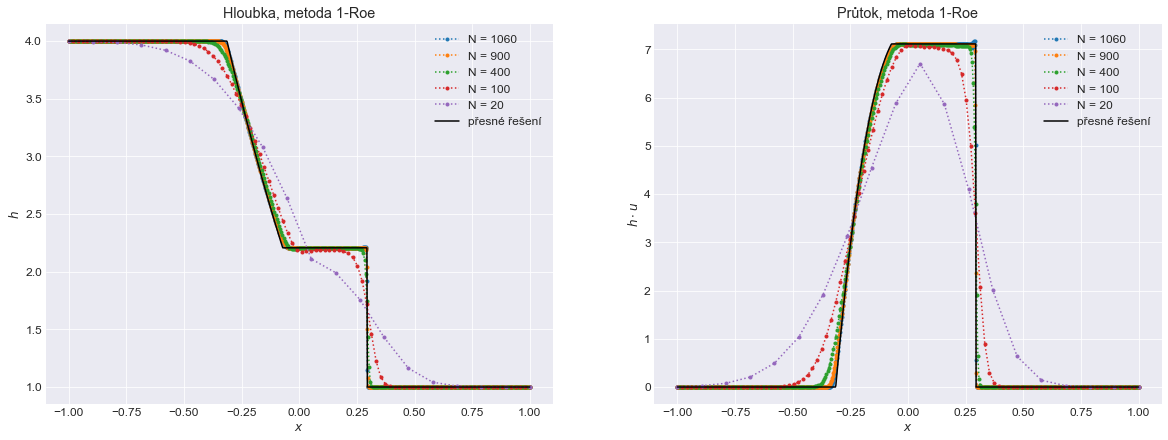

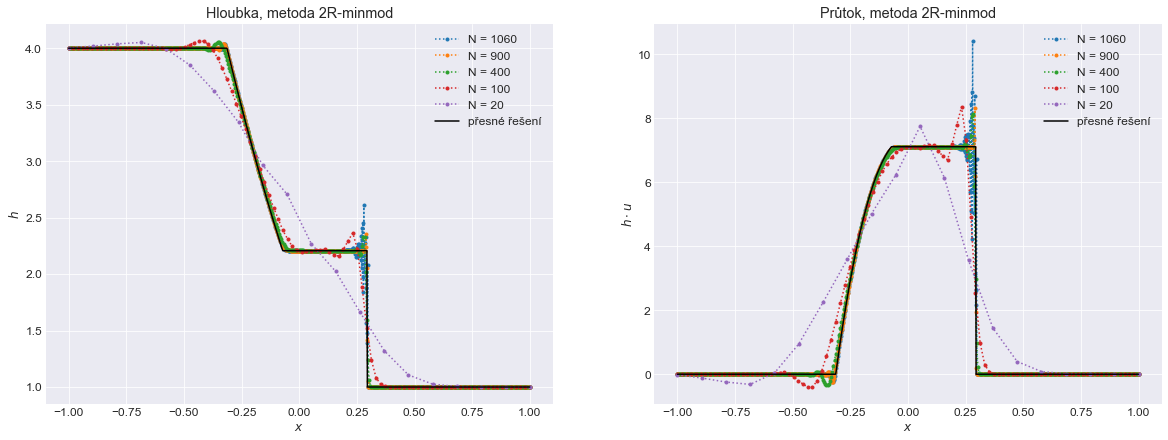

In [5]:
ms = [0,2]
for m in ms:
    
    for i in range(len(Ns),0,-1):
        plt.subplot(1,2,1)
        plt.plot(results[m][i][3],results[m][i][2][0],'.:',label = f'N = {Ns[i-1]}')
        plt.legend()
        plt.xlabel('$x$')
        plt.ylabel('$h$')
        plt.title(f'Hloubka, metoda {results[m][0]}')
        plt.subplot(1,2,2)
        plt.plot(results[m][i][3],results[m][i][2][1],'.:',label = f'N = {Ns[i-1]}')
        plt.legend()
        plt.xlabel('$x$')
        plt.ylabel('$h\cdot u$')
        plt.title(f'Průtok, metoda {results[m][0]}')
    plt.subplot(1,2,1)
    plt.plot(x, exact_sol(x/.05)[0], 'k', label = 'přesné řešení')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(x, exact_sol(x/.05)[1], 'k', label = 'přesné řešení')
    plt.legend()
    plt.show()

### Porovnání různých metod


Jak jsme již viděli při předchozím experimentu, metody vyšších řádů zahrnují oscilace v bodech nespojitosti. Numerická difuze v metodách prvního řádu tyto oscilace vyhlazuje. Na alespoň částečné odstranění oscilací u metod vyšších řádů se používají omezovací funkce (limitry).

Následující grafy ukazují řešení pro různé použité metody, ostatní parametry úlohy jako prostorové a časové dělení jsou shodné. Metoda prvního řádu je zastoupena Godunovovou metodou s Roe přibližným Riemannovým řešičem. Metody druhého řádu jsou tři. Všechny používají také Roeho přibližný Riemannův řešič, liší se ale v použitých limitrech. Použit je *minmod*, *superbee* a *mc* limitr.

Jak v hloubce, tak v průtoku vidíme, že markantní rozdíl nastává pouze mezi metodou prvního řádu a metodami druhého řádu bez ohledu na použité limitry. Pokud se zaměříme na oscilace metod druhého řádu, pak nejmenších oscilací dosahujeme s použitím limitru *minmod*. 

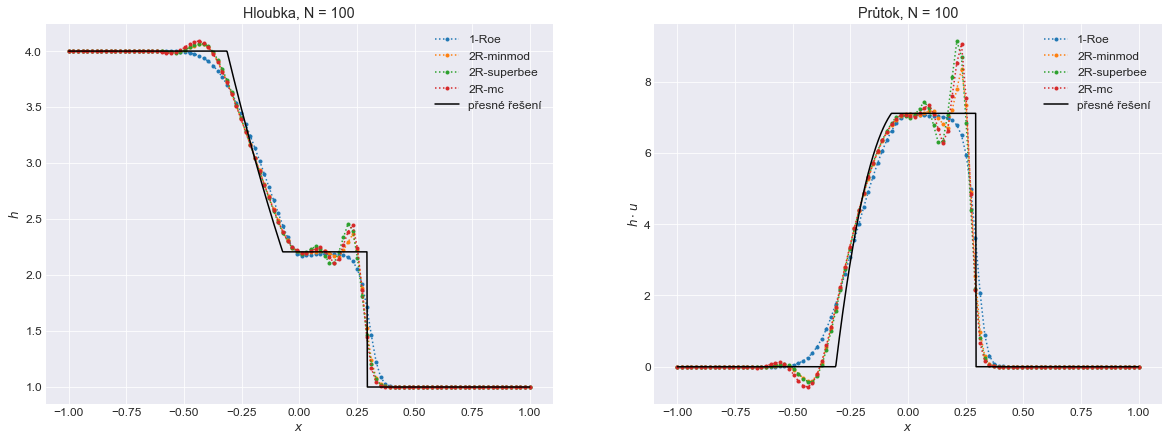

In [6]:
n=2
ms = [0,2,3,4]

for m in ms:
    plt.subplot(1,2,1)
    plt.plot(results[m][n][3],results[m][n][2][0],'.:',label = f'{results[m][0]}')
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$h$')
    plt.title(f'Hloubka, N = {Ns[n-1]}')
    plt.subplot(1,2,2)
    plt.plot(results[m][n][3],results[m][n][2][1],'.:',label = f'{results[m][0]}')
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$h\cdot u$')
    plt.title(f'Průtok, N = {Ns[n-1]}')
plt.subplot(1,2,1)
plt.plot(x, exact_sol(x/.05)[0], 'k', label = 'přesné řešení')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x, exact_sol(x/.05)[1], 'k', label = 'přesné řešení')
plt.legend()
plt.show()

Mezi přibližnými Riemannovými řešiči je obecně malý rozdíl v poskytovaném řešení. Na následujícím obrázku jsou porvnány Roe a hll řešiče a to ve výřezu řešení v okolí bodu nespojistosti, tam je obecně rozdíl mezi řešiči největší. I přesto je velmi malý ($\approx 0.07$) Pro porovnání je přidané i řešení s pomocí jedné z metod vyššího řádu. 

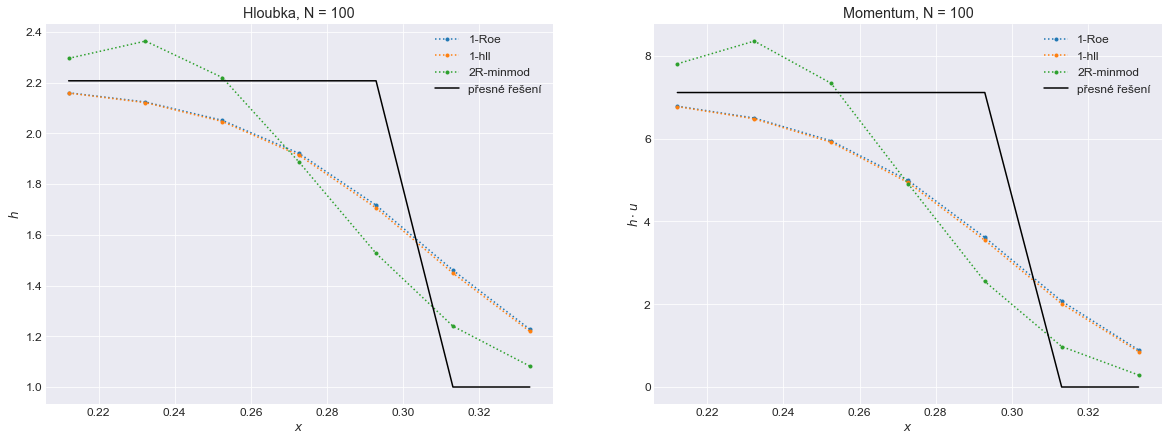

In [7]:
n=2
ms = [0,1,2]
imin, imax = 60, 67

for m in ms:
    plt.subplot(1,2,1)
    plt.plot(results[m][n][3][imin:imax],results[m][n][2][0][imin:imax],'.:',label = f'{results[m][0]}')
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$h$')
    plt.title(f'Hloubka, N = {Ns[n-1]}')
    plt.subplot(1,2,2)
    plt.plot(results[m][n][3][imin:imax],results[m][n][2][1][imin:imax],'.:',label = f'{results[m][0]}')
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$h\cdot u$')
    plt.title(f'Momentum, N = {Ns[n-1]}')
plt.subplot(1,2,1)
plt.plot(results[0][n][3][imin:imax], exact_sol(results[0][n][3][imin:imax]/.05)[0], 'k', label = 'přesné řešení')    
plt.legend()
plt.subplot(1,2,2)
plt.plot(results[0][n][3][imin:imax], exact_sol(results[0][n][3][imin:imax]/.05)[1], 'k', label = 'přesné řešení')   
plt.legend()
plt.show()


Vzhledem k tomu, že k naší úloze máme k dispozici i přesné řešení, můžeme snadno vypočítat globální diskretizační chybu danou vztahem

$$E = \sum_{j=1}^N\left|Q^T_j-q(x_j,t_T)\right|$$

Na dalším grafu je porovnána chyba $E$ pro různé dělení $N$ a různé metody. Opět je vidět, že se chyba pro zjemňující se dělení zmenšuje. Zároveň je chyba $E$ menší pro metody 2. řádu. Pro nejjemnější dělení, kdy $N=1060$, je ovšem již porušena CFL podmínka a chyba $E$ se zvětšuje. U některých metod dokonce velmi razantně a proto pro tyto metody není poslední bod v grafu vůbec zobrazen.

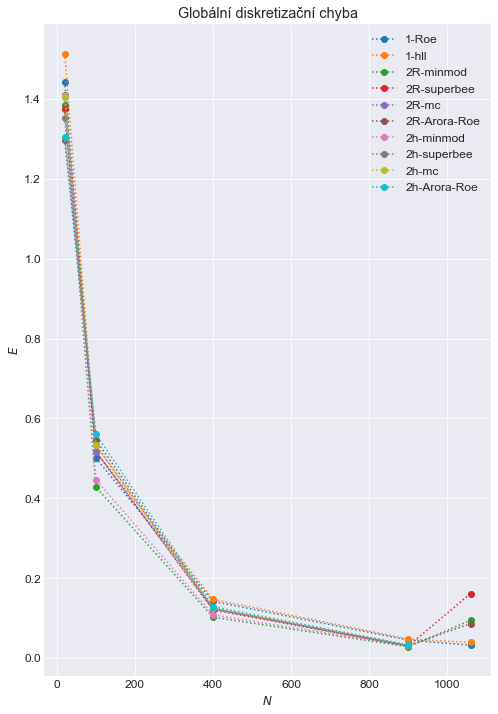

In [8]:
plt.figure(figsize=(8,12))
for m in range(len(results)): 
    plt.plot(Ns,[results[m][1][1],results[m][2][1],results[m][3][1],results[m][4][1],results[m][5][1]],'o:',label = f'{results[m][0]}')
plt.xlabel('$N$')
plt.ylabel('$E$')
plt.title(f'Globální diskretizační chyba')
plt.legend()
plt.show()

### Závěrečné shrnutí

V následující tabulce jsou výsledky pro všechny použité metody a použitá dělení $N$. Courantovo číslo, neboli CFL podmínka, je vypočteno jako maximální hodnota v celém průběhu výpočtu, tedy jak v prostoru tak v čase. Použita byla maximální rychlost vlny vrácená Riemannovými řešiči. $E$ je pak globální diskretizační chyba vzhledem k přesnému řešení.


In [9]:
table_width = 135
print(f'-'*table_width)
print(f'|                  |   {Ns[0]:^18} |   {Ns[1]:^17}  |   {Ns[2]:^17}  |   {Ns[3]:^17}  |   {Ns[4]:^17}  |')
print(f'|      Metoda      | {"CFL":^7} | {"E":^10} | {"CFL":^7} | {"E":^10} | {"CFL":^7} | {"E":^10} | {"CFL":^7} | {"E":^10} | {"CFL":^7} | {"E":^10} |')
print(f'-'*table_width)
for i in range(len(results)):
    last = '{:7.4f}'.format(results[i][5][0]) if results[i][5][0] < 99 else ">99"
    print(f'|  {results[i][0]:14}  | {results[i][1][0]:7.4f} | {results[i][1][1]:10.4e} | {results[i][2][0]:7.4f} | {results[i][2][1]:10.4e} | {results[i][3][0]:7.4f} | {results[i][3][1]:10.4e} | {results[i][4][0]:7.4f} | {results[i][4][1]:10.4e} | {last:>7} | {results[i][5][1]:10.4e} |')
    
print(f'-'*table_width)

---------------------------------------------------------------------------------------------------------------------------------------
|                  |           20         |          100         |          400         |          900         |         1060         |
|      Metoda      |   CFL   |     E      |   CFL   |     E      |   CFL   |     E      |   CFL   |     E      |   CFL   |     E      |
---------------------------------------------------------------------------------------------------------------------------------------
|  1-Roe           |  0.0189 | 1.4425e+00 |  0.0984 | 5.0052e-01 |  0.3938 | 1.4250e-01 |  0.8857 | 4.5431e-02 |  1.0441 | 3.2529e-02 |
|  1-hll           |  0.0189 | 1.5131e+00 |  0.0983 | 5.1671e-01 |  0.3937 | 1.4735e-01 |  0.8856 | 4.8110e-02 |  1.0747 | 3.9311e-02 |
|  2R-minmod       |  0.0195 | 1.3855e+00 |  0.1033 | 4.2822e-01 |  0.4137 | 1.0274e-01 |  0.9198 | 2.8899e-02 |  1.0972 | 9.4670e-02 |
|  2R-superbee     |  0.0196 | 1.3744e+00 |  0.1

Ze získaných hodnot lze odvodit následující tvrzení, která odpovídají teoretickým poznatkům:

- se zjemňujícím se prostorovým dělením a za předpokladu konstatního časového dělení se zvětšuje hodnota Courantova čísla,
- větší hodnota Courantova čísla znamená menší globální diskretizační chybu,
- pokud hodnota Courantova čísla přesáhne 1, je porušena CFL podmínka a globální diskretizační chyba se zvětšuje, u některých metod velmi razantně,
- metoda vyššího řádu při použití omezujících funkcí vykazuje nižší globální diskretizační chybu oproti metodě prvního řádu,
- metoda prvního řádu řešení vyhlazuje, díky numerické difuzi.

Nejlepší hodnoty globální diskretizační chyby dosáhla v našich numerických testech metoda druhého řádu, s Roeovým přibližným Riemannovým řešičem a minmod limitrem pro prostorové dělení $N=900$. Zajímavé také je, že metody prvního řádu dosahují hezkých výsledků i v případě kdy CFL podmínka překročí, i když jen velmi málo, hodnotu $1$.



### Nelineární a nespojitá počáteční podmínka

Úplně na závěr, jen pro ilustraci, si ukažme řešení SWE úlohy pro nelineární a nespojitou počáteční podmínku. Zvolili jsme funkci $sin()$ se skokem uprostřed intervalu. Použita je Godunovova metoda 1. řádu s Roeovým přibližným Riemannovým řešičem. I na takovéto úloze funguje Godunovova metoda správně.


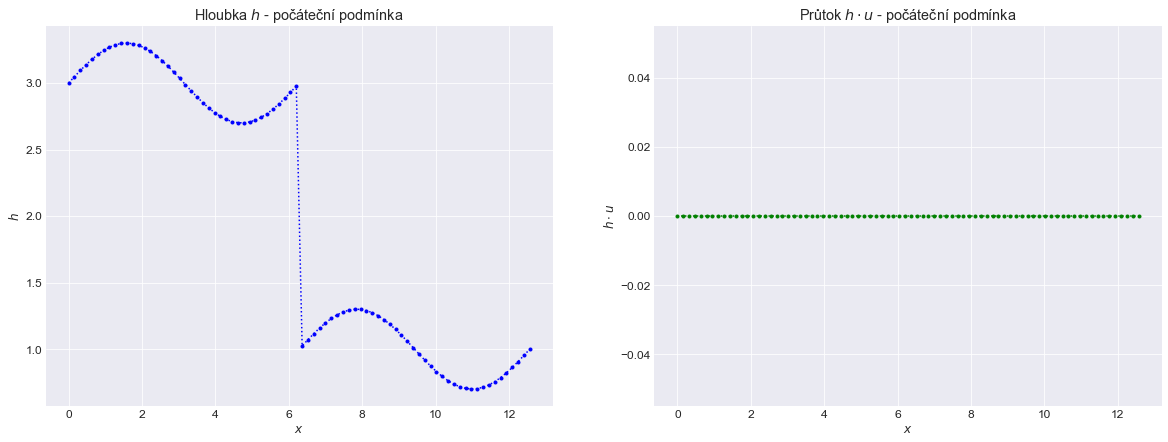

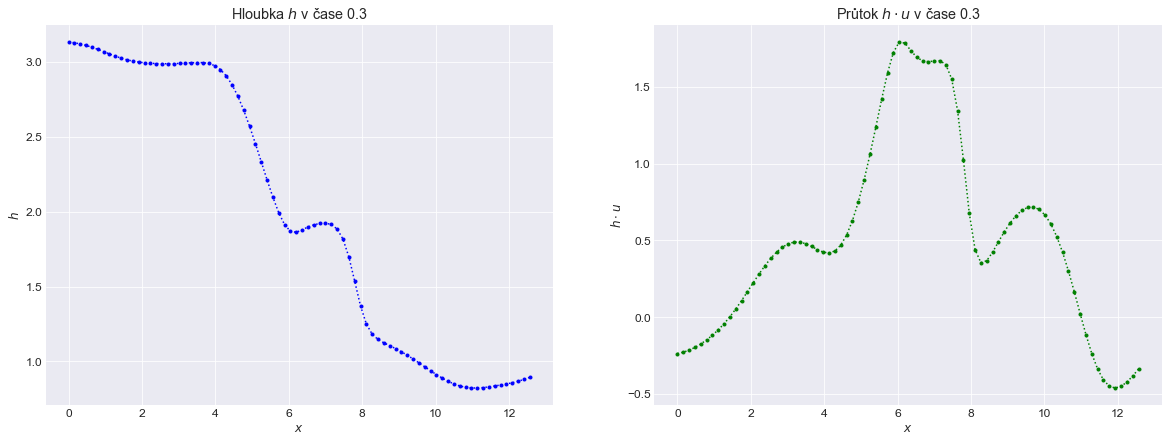

In [10]:
x_start = 0
x_end = np.pi * 4
N = 80
Q_init = shallow_ic(N, 4)
Qs, x, cfl, E = shallow_sol(Q_init, 
        N = N,
        x_start = x_start, x_end=x_end,
        T = 0.3,
        exact_q = False,
        plot_sol=True
        )     

### Literatura

[1] Leveque knížka  
[2] Brandner skripta  
[3] dokumentace Clawpack.org  